# 1. 학습 테스트 데이터 로딩

In [102]:
import pandas as pd
train = pd.read_csv('train_to_class.txt')
val = pd.read_csv('val_to_class.txt')

In [136]:
train

,Unnamed: 0,class,imagepath
0,2AM 임슬옹11.jpg,1,C:\Users\성수현\face_image_align\수정본\training\tra...
1,2AM 임슬옹18.jpg,1,C:\Users\성수현\face_image_align\수정본\training\tra...
2,2AM 임슬옹19.jpg,1,C:\Users\성수현\face_image_align\수정본\training\tra...
3,2AM 임슬옹20.jpg,1,C:\Users\성수현\face_image_align\수정본\training\tra...
4,2AM 임슬옹28.jpg,3,C:\Users\성수현\face_image_align\수정본\training\tra...
...,...,...,...
6034,호반건설 회장 김상열4.jpg,0,C:\Users\성수현\face_image_align\수정본\training\tra...
6035,호반건설 회장 김상열40.jpg,0,C:\Users\성수현\face_image_align\수정본\training\tra...
6036,호반건설 회장 김상열41.jpg,7,C:\Users\성수현\face_image_align\수정본\training\tra...
6037,호반건설 회장 김상열42.jpg,0,C:\Users\성수현\face_image_align\수정본\training\tra...


In [104]:
val

,Unnamed: 0,class,imagepath
0,2AM 임슬옹26.jpg,3,C:\Users\성수현\face_image_align\수정본\validate\val...
1,2AM 임슬옹39.jpg,3,C:\Users\성수현\face_image_align\수정본\validate\val...
2,2AM 임슬옹40.jpg,3,C:\Users\성수현\face_image_align\수정본\validate\val...
3,2AM 임슬옹8.jpg,1,C:\Users\성수현\face_image_align\수정본\validate\val...
4,2PM 장우영27.jpg,1,C:\Users\성수현\face_image_align\수정본\validate\val...
...,...,...,...
1680,호반건설 회장 김상열12.jpg,8,C:\Users\성수현\face_image_align\수정본\validate\val...
1681,호반건설 회장 김상열33.jpg,0,C:\Users\성수현\face_image_align\수정본\validate\val...
1682,호반건설 회장 김상열34.jpg,0,C:\Users\성수현\face_image_align\수정본\validate\val...
1683,호반건설 회장 김상열47.jpg,0,C:\Users\성수현\face_image_align\수정본\validate\val...


In [140]:
df = pd.concat([val,train])
df

,Unnamed: 0,class,imagepath
0,2AM 임슬옹26.jpg,3,C:\Users\성수현\face_image_align\수정본\validate\val...
1,2AM 임슬옹39.jpg,3,C:\Users\성수현\face_image_align\수정본\validate\val...
2,2AM 임슬옹40.jpg,3,C:\Users\성수현\face_image_align\수정본\validate\val...
3,2AM 임슬옹8.jpg,1,C:\Users\성수현\face_image_align\수정본\validate\val...
4,2PM 장우영27.jpg,1,C:\Users\성수현\face_image_align\수정본\validate\val...
...,...,...,...
6034,호반건설 회장 김상열4.jpg,0,C:\Users\성수현\face_image_align\수정본\training\tra...
6035,호반건설 회장 김상열40.jpg,0,C:\Users\성수현\face_image_align\수정본\training\tra...
6036,호반건설 회장 김상열41.jpg,7,C:\Users\성수현\face_image_align\수정본\training\tra...
6037,호반건설 회장 김상열42.jpg,0,C:\Users\성수현\face_image_align\수정본\training\tra...


In [141]:
# class_mode = categorical을 적용하기위한 작업
df['class'] = df['class'].apply(lambda x :[x])

In [144]:
df.reset_index(drop=True,inplace=True)

# 2. 모델 생성

In [114]:
import matplotlib.pyplot as plt
from keras import models
from keras import layers

model = models.Sequential()

# hidden layer에 합성곱과 맥스 풀링 설정
model.add(layers.Conv2D(256, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


# 1차원으로 변환
model.add(layers.Flatten())

# 입력 데이터에 50%의 노드를 무작위로 사용하지 않게 막는다.
model.add(layers.Dropout(0.5))

# 결과얻기
# class를 13개로 정하였으므로 softmax 설정
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))

# 3. 모델 컴파일

In [116]:
import tensorflow as tf
from keras import optimizers
from keras import losses
from keras import metrics

#출력이 13개이므로 categorical_crossentropy 설정
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc'])

# 4. 이미지 증식

In [121]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# 4.1 train,validation, test datagen 생성
>  8:1:1의 비율

In [122]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    shear_range = 0.2,
    horizontal_flip=True,
    fill_mode='constant'
)

# 검증 데이터는 증식을 사용하면 안됨
# 모델의 과적합을 막기 위한 기술이므로 검증에서는 당연히 배제되어야 함.
test_datagen = ImageDataGenerator(rescale=1./255)

In [156]:
train_generator = train_datagen.flow_from_dataframe(
    #이미지 경로
    df[:6000],
    x_col='imagepath',
    y_col='class',
    # 사용할 이미지 크기
    target_size=(150,150),
    # 배치 크기
    batch_size = 80,
    # 손실 데이터 연관
    class_mode = 'categorical',
#     classes = ['0','1','2','3','4','5','6','7','8','9','10','11','12']
)

Found 6000 validated image filenames belonging to 13 classes.


In [154]:
validation_generator = test_datagen.flow_from_dataframe(
    #이미지 경로
    df[6000:6862],
    x_col='imagepath',
    y_col= 'class',
    # 사용할 이미지 크기
    target_size=(150,150),
    # 배치 크기
    batch_size = 30,
    # 손실 데이터 연관
    class_mode = 'categorical',
#     classes = ['0','1','2','3','4','5','6','7','8','9','10','11','12']
)

Found 862 validated image filenames belonging to 13 classes.


In [153]:
test_generator = test_datagen.flow_from_dataframe(
    #이미지 경로
    df[6862:7724],
    x_col='imagepath',
    y_col='class',
    # 사용할 이미지 크기
    target_size=(150,150),
    # 배치 크기
    batch_size = 30,
    # 손실 데이터 연관
    class_mode = None,
)

Found 862 validated image filenames.


In [181]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=validation_generator.n//validation_generator.batch_size
STEP_SIZE_TEST=test_generator.n//test_generator.batch_size
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=validation_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=80
)

C:\anaconda3\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/80
75/75 [==============================] - 425s 6s/step - loss: 2.1368 - acc: 0.2405 - val_loss: 2.1983 - val_acc: 0.2571
Epoch 2/80
75/75 [==============================] - 433s 6s/step - loss: 2.1042 - acc: 0.2552 - val_loss: 2.1545 - val_acc: 0.2702
Epoch 3/80
75/75 [==============================] - 431s 6s/step - loss: 2.0890 - acc: 0.2620 - val_loss: 2.1513 - val_acc: 0.2524
Epoch 4/80
75/75 [==============================] - 431s 6s/step - loss: 2.0667 - acc: 0.2693 - val_loss: 2.1142 - val_acc: 0.2786
Epoch 5/80
75/75 [==============================] - 430s 6s/step - loss: 2.0478 - acc: 0.2735 - val_loss: 2.0917 - val_acc: 0.2798
Epoch 6/80
75/75 [==============================] - 430s 6s/step - loss: 2.0252 - acc: 0.2805 - val_loss: 2.0763 - val_acc: 0.2833
Epoch 7/80
75/75 [==============================] - 430s 6s/step - loss: 2.0218 - acc: 0.2772 - val_loss: 2.0652 - val_acc: 0.2988
Epoch 8/80
75/75 [==============================] - 430s 6s/step - loss: 2.0070 - a

75/75 [==============================] - 427s 6s/step - loss: 1.6900 - acc: 0.3898 - val_loss: 1.8172 - val_acc: 0.3762
Epoch 64/80
75/75 [==============================] - 428s 6s/step - loss: 1.6891 - acc: 0.3832 - val_loss: 1.8206 - val_acc: 0.3607
Epoch 65/80
75/75 [==============================] - 427s 6s/step - loss: 1.6922 - acc: 0.3890 - val_loss: 1.8038 - val_acc: 0.3786
Epoch 66/80
75/75 [==============================] - 428s 6s/step - loss: 1.6849 - acc: 0.3893 - val_loss: 1.7985 - val_acc: 0.3643
Epoch 67/80
75/75 [==============================] - 428s 6s/step - loss: 1.6818 - acc: 0.3908 - val_loss: 1.7866 - val_acc: 0.3702
Epoch 68/80
75/75 [==============================] - 429s 6s/step - loss: 1.6749 - acc: 0.3960 - val_loss: 1.7924 - val_acc: 0.3702
Epoch 69/80
75/75 [==============================] - 431s 6s/step - loss: 1.6878 - acc: 0.3928 - val_loss: 1.8049 - val_acc: 0.3750
Epoch 70/80
75/75 [==============================] - 428s 6s/step - loss: 1.6832 - acc: 

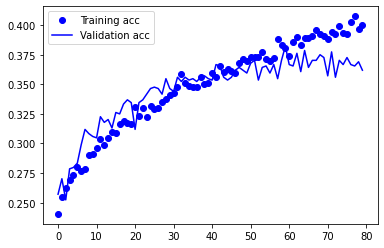

In [182]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc , 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b',label='Validation acc')
plt.legend()

plt.show()

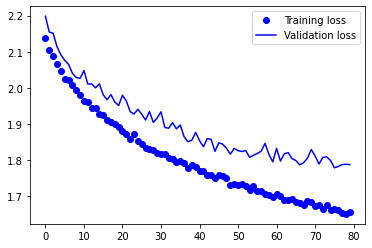

In [183]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss , 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.legend()

plt.show()

In [184]:
model.save_weights('checkpoints')

In [185]:
from tensorflow.keras.models import load_model
model.save("model.h5")

AttributeError: module 'h5py' has no attribute 'File'

In [186]:
from tensorflow.keras.models import save_model
import os

model.save("model")

AttributeError: module 'h5py' has no attribute 'File'

In [187]:
import numpy as np
from tensorflow.keras.models import load_model

history_path = './model/my_history.npy'
np.save(history_path, history.history)

In [188]:
!git config --global user.email "dame95@naver.com"

In [189]:
!git config --global user.name "marudengi"

In [192]:
!git config --global core.quotepath false

In [193]:
!git init

Reinitialized existing Git repository in C:/Users/�꽦�닔�쁽/face_image_align/.git/


In [196]:
!git status

On branch master

No commits yet

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	 Image quantification and clustering.ipynb
	.ipynb_checkpoints/
	Crawling_images2/
	checkpoint
	checkpoints.data-00000-of-00001
	checkpoints.index
	face_align.ipynb
	image_modeling.ipynb
	images/
	man_train_encodings.txt
	model/
	openface/
	shape_predictor_68_face_landmarks.dat
	still-sensor-325313-e544dd4f101f.json
	temp/
	train_encodings.txt
	train_to_class.txt
	val_to_class.txt
	validate_encodings.txt
	�깦�뵆/
	�닔�젙蹂�/
	�뿬�옄_�씪踰⑤쭅_100/
	�썝蹂�/

nothing added to commit but untracked files present (use "git add" to track)


In [ ]:
!git remote add origin 